Decision Tree

Tiatnic Survival Dataset

In [91]:
#Import the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [92]:
#Load the data sets- train and test 
df = pd.read_csv("train.csv")

In [93]:
#Look at top values of train data 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
#Print the column names of train data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [95]:
#Print the dimension of train and test data
df.shape

(891, 12)

In [96]:
#Print the number of missing values in each column of train and test data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

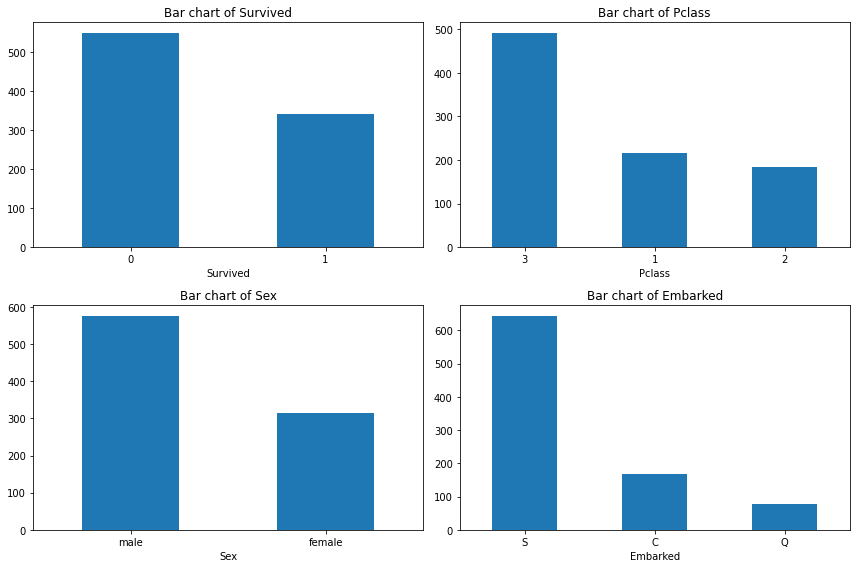

In [97]:
#Barchart of Survived, Pclass, Sex, Embarked
categorical_feautures = ["Survived","Pclass","Sex","Embarked"]

plt.figure(figsize=(12,8))
for i,feature in enumerate(categorical_feautures):
    plt.subplot(2,2,i+1)
    df[feature].value_counts().plot(kind="bar")
    plt.xticks(rotation=0)
    plt.title(f"Bar chart of {feature}")
plt.tight_layout()

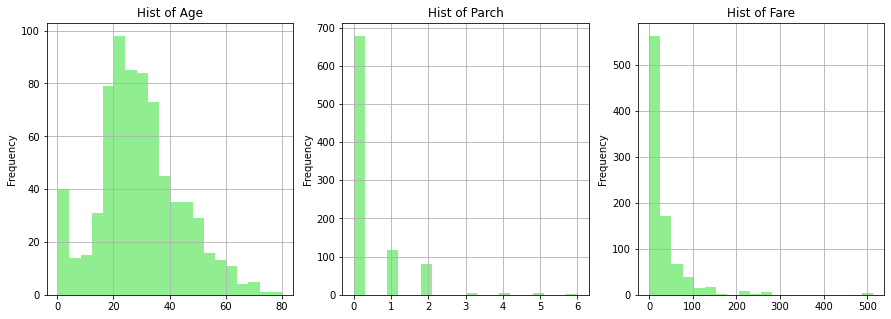

In [98]:
#Histogram of Age, Parch, Fare
hist_colums = ["Age","Parch","Fare"]
plt.figure(figsize=(15,5))
for i , feature in enumerate(hist_colums):
    plt.subplot(1,3,i+1)
    # plt.hist(df[feature])
    df[feature].hist(bins=20,color="lightgreen")
    plt.title(f"Hist of {feature}")
    plt.ylabel("Frequency")
    

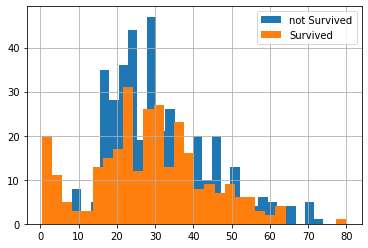

In [99]:
#Plot histogram of age for survived and did not survived class
# df[df["Survived"] == 0]["Age"].plot(kind="hist",label="not Survived")
# df[df["Survived"] == 1]["Age"].plot(kind="hist",label="Survived")
df[df["Survived"] == 0]["Age"].hist(bins=30,label="not Survived")
df[df["Survived"] == 1]["Age"].hist(bins=30,label="Survived")

plt.legend()
plt.show()

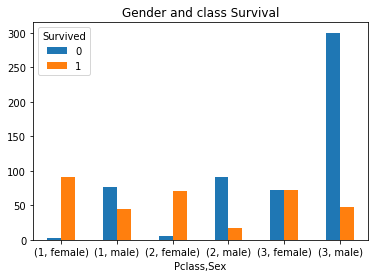

In [100]:
#Count class and geder wise survival rate - plot with appropriate chart
df.groupby(["Pclass","Sex"])["Survived"].value_counts().unstack().plot(kind="bar")
plt.title("Gender and class Survival")
plt.xticks(rotation=0)
plt.show()

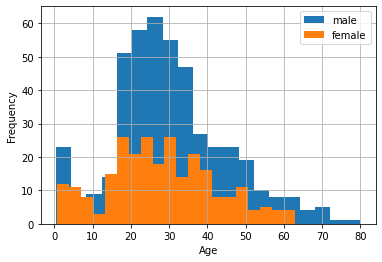

In [101]:
#Age wise Distribution of Male and Female passengers
df[df["Sex"] == "male"]["Age"].hist(bins=20,label="male")
df[df["Sex"] == "female"]["Age"].hist(bins=20,label="female")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend()
plt.show()

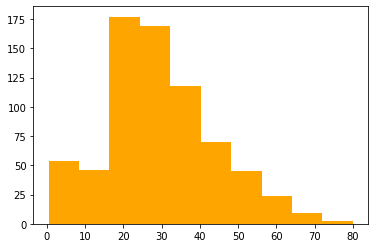

In [102]:
#Histogram of Age of the given data set(sample)
plt.hist(df["Age"],color="orange")
plt.show()

## Handling Missing Values

In [103]:
#Replace the msiing values in Embarked column by 'S'
print(df["Embarked"].isnull().sum())
mode = df["Embarked"].mode()[0]
df["Embarked"].fillna(mode,inplace=True)


2


/tmp/ipykernel_19478/1837476152.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(mode,inplace=True)


In [104]:
# Check number of missing values in 'Fare'

missing_fare_count = df["Fare"].isnull().sum()
print(f"Missing values in Fare before imputation: {missing_fare_count}")

# Calculate median
fare_median = df["Fare"].median()

# Impute missing values with median
df["Fare"].fillna(fare_median, inplace=True)

# Check again after imputation
print(f"Missing values in Fare after imputation: {df['Fare'].isnull().sum()}")


Missing values in Fare before imputation: 0
Missing values in Fare after imputation: 0


/tmp/ipykernel_19478/3444181553.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(fare_median, inplace=True)


In [105]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

print(df["Age"].isnull().sum())
mean = df["Age"].mean()
dist = df["Age"].std()
nan_age = df["Age"].isnull().sum()
random_age = np.random.normal(mean,dist,nan_age)
random_age = np.abs(random_age)
age_nan_mask = df['Age'].isnull()
df.loc[age_nan_mask, 'Age'] = random_age
df['Age'] = df['Age'].astype(int)

print(f"Missing Age after imputation with random normal draw (mean={mean:.2f}, std={dist:.2f}): {df['Age'].isnull().sum()}")
print("First 5 Age values after imputation:")
print(df['Age'].head())


177
Missing Age after imputation with random normal draw (mean=29.70, std=14.53): 0
First 5 Age values after imputation:
0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int64


## Feature Engineering - Creating new features

In [106]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
df["FamilySize"] = df["Parch"] + df["SibSp"] + 1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,1


In [107]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
df["IsAlone"] = df["FamilySize"] == 1
df["IsAlone"] = df["IsAlone"].astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19,1,2,W./C. 6607,23.4500,NaN,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,1,1


In [108]:
df["hasCabin"] = df["Cabin"] == 'nan'
df["hasCabin"] = df["hasCabin"].astype(int)



## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [109]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
df.drop(columns_to_drop,axis=1, inplace=True)

## Model Building

In [110]:
#Prepare X and y
Y = df["Survived"]
X = df.drop(columns=["Survived"])
X.dtypes



Pclass          int64
Sex            object
Age             int64
Fare          float64
Embarked       object
FamilySize      int64
IsAlone         int64
hasCabin        int64
dtype: object

In [111]:
# Label encoding of categorical features
cat_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X,columns=cat_cols,drop_first=True)
X

,Pclass,Age,Fare,FamilySize,IsAlone,hasCabin,Sex_male,Embarked_Q,Embarked_S
0,3,22,7.2500,2,0,0,True,False,True
1,1,38,71.2833,2,0,0,False,False,False
2,3,26,7.9250,1,1,0,False,False,True
3,1,35,53.1000,2,0,0,False,False,True
4,3,35,8.0500,1,1,0,True,False,True
...,...,...,...,...,...,...,...,...,...
886,2,27,13.0000,1,1,0,True,False,True
887,1,19,30.0000,1,1,0,False,False,True
888,3,19,23.4500,4,0,0,False,False,True
889,1,26,30.0000,1,1,0,True,False,False


In [112]:
# concat df_categorical with original df

<Axes: >

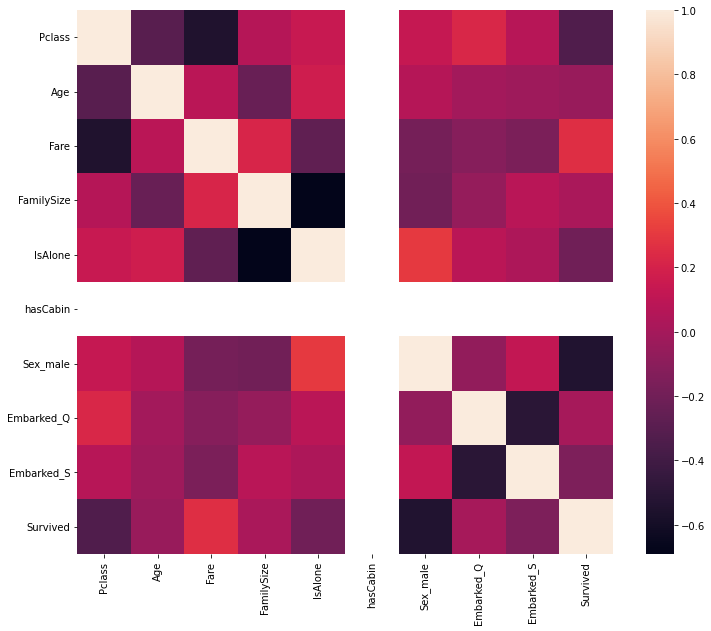

In [113]:
#Do a pairplot of all features
plt.figure(figsize=(12, 10))
sns.heatmap( pd.concat([X, Y], axis=1).corr())

In [114]:
X

,Pclass,Age,Fare,FamilySize,IsAlone,hasCabin,Sex_male,Embarked_Q,Embarked_S
0,3,22,7.2500,2,0,0,True,False,True
1,1,38,71.2833,2,0,0,False,False,False
2,3,26,7.9250,1,1,0,False,False,True
3,1,35,53.1000,2,0,0,False,False,True
4,3,35,8.0500,1,1,0,True,False,True
...,...,...,...,...,...,...,...,...,...
886,2,27,13.0000,1,1,0,True,False,True
887,1,19,30.0000,1,1,0,False,False,True
888,3,19,23.4500,4,0,0,False,False,True
889,1,26,30.0000,1,1,0,True,False,False


In [115]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
X_train , X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [116]:
# Create the model
# Fitting the decision tree with default hyperparameters
# Importing decision tree classifier from sklearn library
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

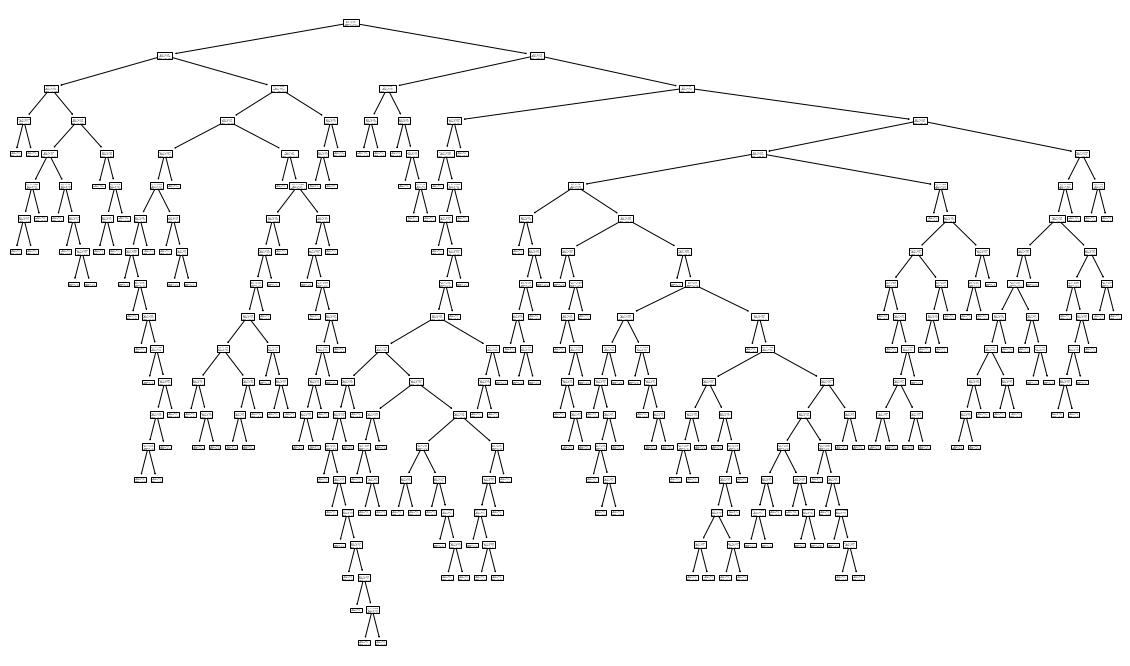

In [117]:
#Print the tree

# Importing required packages for visualization
plt.figure(figsize=(20,12))
plot_tree(model)
plt.show()


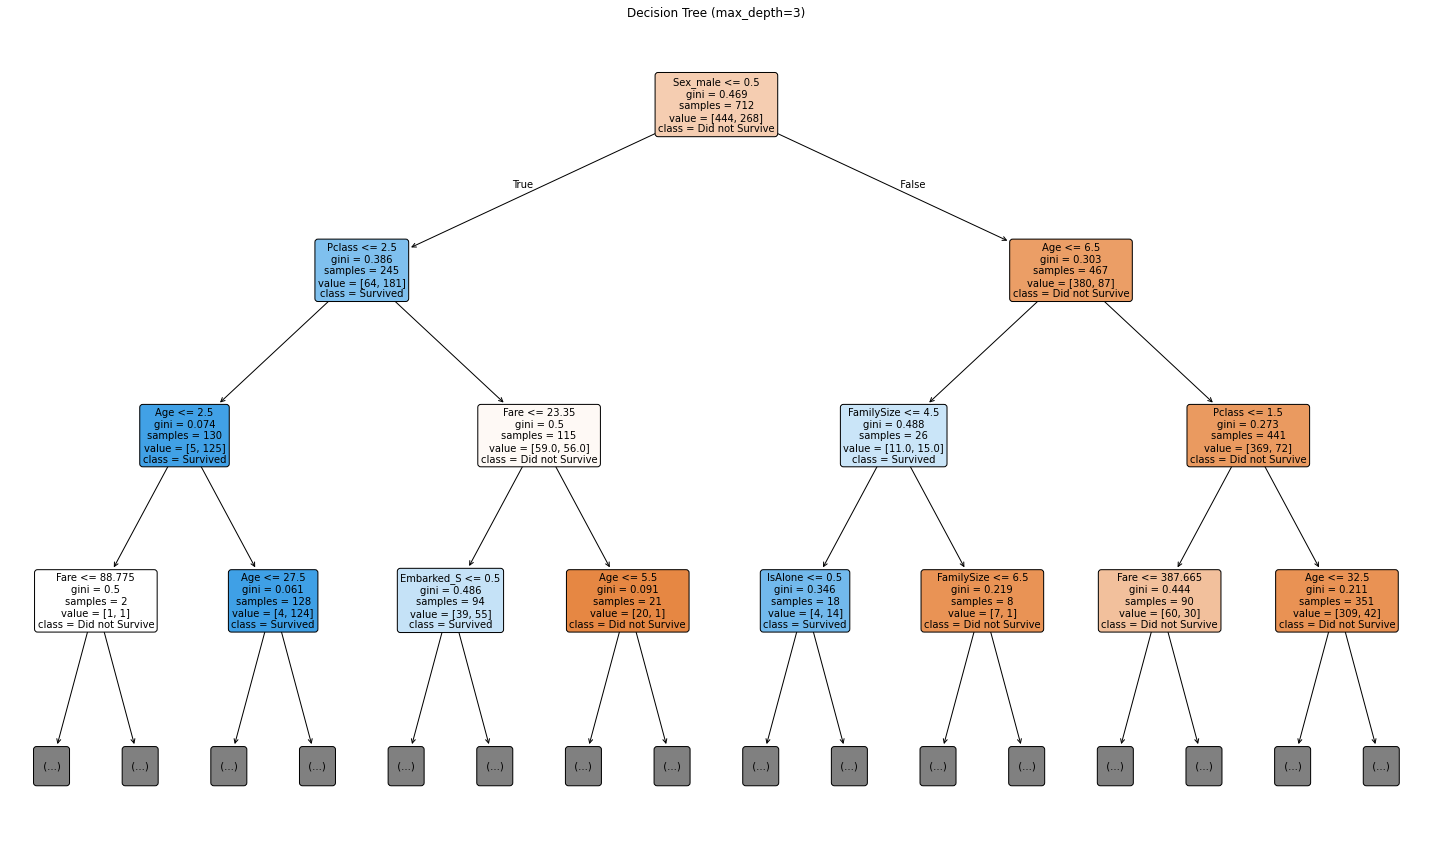

In [118]:
# plotting tree with max_depth=3
plt.figure(figsize=(20,12))
plot_tree(model,
          max_depth=3,
          feature_names=X.columns,
           class_names=['Did not Survive', 'Survived'],
           filled=True,
           rounded=True,
           fontsize=10)
plt.title("Decision Tree (max_depth=3)")
plt.tight_layout()
plt.show()

<img src="tree2.png">

In [119]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report
y_pred = model.predict(X_test)
print(f"Accuracy : {accuracy_score(Y_test,y_pred)}")
print(classification_report(Y_test,y_pred,target_names=['Did not Survive', 'Survived']))

Accuracy : 0.7877094972067039
                 precision    recall  f1-score   support

Did not Survive       0.83      0.80      0.82       105
       Survived       0.73      0.77      0.75        74

       accuracy                           0.79       179
      macro avg       0.78      0.79      0.78       179
   weighted avg       0.79      0.79      0.79       179



<Axes: >

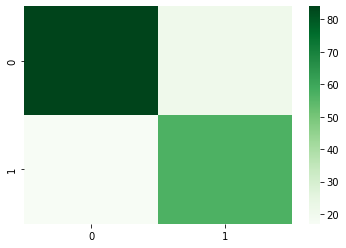

In [120]:
# Printing confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,cmap="Greens")